# Scan LSST aerosols during 10 years

- Author :Sylvie Dagoret-Campagne
- affiliation : LAL,IN2P3,CNRS
- organization : LSST 

- creation : Tuesday 2nd May 2016



In [90]:
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.basemap import Basemap
from matplotlib import colors
from matplotlib.backends.backend_pdf import PdfPages
import pandas as pd
import h5py
%matplotlib inline
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import libCaliopAOD as cal

In [70]:
#from __future__ import print_function
import datetime
from matplotlib.dates import MonthLocator, WeekdayLocator,DateFormatter
from matplotlib.dates import MONDAY

In [71]:
year_start=2007   # choose the month number
year_stop=2015   # choose the month number
month_start=0      # choose first month
month_stop=11      # choose last month
month_numbers=np.arange(month_start,month_stop+1)
month_stringnumber=['01','02','03','04','05','06','07','08','09','10','11','12']

In [4]:
path_root='/Users/dagoret-campagnesylvie/MacOsX/LSST/MyWork/CALIPSO/DATA/ICARE/CALIOP/L3/CAL_LID_L3_APro_AllSky.v3.00/CAL_LID_L3_APro_AllSky.v3.00'

In [5]:
filename_base='CAL_LID_L3_APro_AllSky-Standard-V3-00' # 

In [72]:
nb_of_years=year_stop-year_start+1                               # number of years   
number_of_monthes_per_year=month_numbers.shape[0]               # number of months per year
total_number_of_monthes=number_of_monthes_per_year*nb_of_years  # total number of monthes over years

### defines constants

In [75]:
data_dates=np.array(datetime.date(year_start,month_start+1,1))

In [76]:
path_root='/Users/dagoret-campagnesylvie/MacOsX/LSST/MyWork/CALIPSO/DATA/ICARE/CALIOP/L3/CAL_LID_L3_APro_AllSky.v3.00/CAL_LID_L3_APro_AllSky.v3.00'
fullpath_root=os.path.join(os.path.join(path_root,str(2007)),'hdf5')
filename_base='CAL_LID_L3_APro_AllSky-Standard-V3-00' 

In [77]:
dayfile_extension= str(year_start)+'-'+month_stringnumber[month_start]+'D'+'.h5'
nightfile_extension=str(year_start)+'-'+month_stringnumber[month_start]+'N'+'.h5'
dayfile_fullname=os.path.join(fullpath_root,filename_base+'.'+dayfile_extension)
nightfile_fullname=os.path.join(fullpath_root,filename_base+'.'+nightfile_extension)
dayfiles_fullname=np.array(dayfile_fullname)
nightfiles_fullname=np.array(nightfile_fullname)

### defines the list of dates and filenames for days and night

In [88]:
for year in range(2007,2016,1):
    fullpath_root=os.path.join(os.path.join(path_root,str(2007)),'hdf5')   
    for month in range(1,13):
        if not (year == 2007 and month ==1):
            dayfile_extension= str(year)+'-'+month_stringnumber[month-1]+'D'+'.h5'
            nightfile_extension=str(year)+'-'+month_stringnumber[month-1]+'N'+'.h5'
            dayfiles_fullname=np.append(dayfiles_fullname,os.path.join(fullpath_root,filename_base+'.'+dayfile_extension))
            nightfiles_fullname=np.append(nightfiles_fullname,os.path.join(fullpath_root,filename_base+'.'+nightfile_extension))
            data_dates= np.append( data_dates , datetime.date(year,month,1))

### Extract data from the files using the library

In [101]:
temperatures=cal.GetValue(dayfiles_fullname[0],'Temperature_Mean')
pressures=cal.GetValue(dayfiles_fullname[0],'Pressure_Mean')
humidity=cal.GetValue(dayfiles_fullname[0],'Relative_Humidity_Mean')

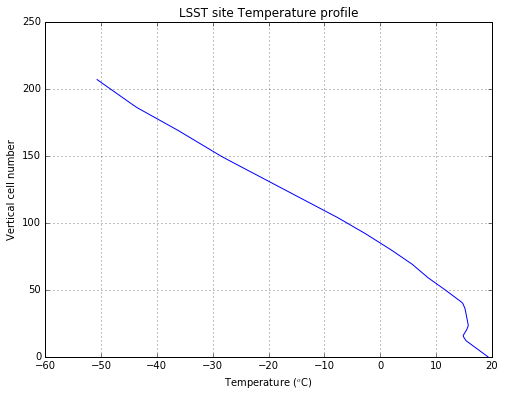

In [112]:
fig=plt.figure(figsize=(8,6))
ax=fig.add_subplot(1,1,1)
ax.plot(temperatures,np.arange(0,temperatures.size))
title= "LSST site Temperature profile"
ax.set_ylabel('Vertical cell number')
ax.set_xlabel('Temperature ($^o$C)')
ax.grid(True)
plt.title(title)

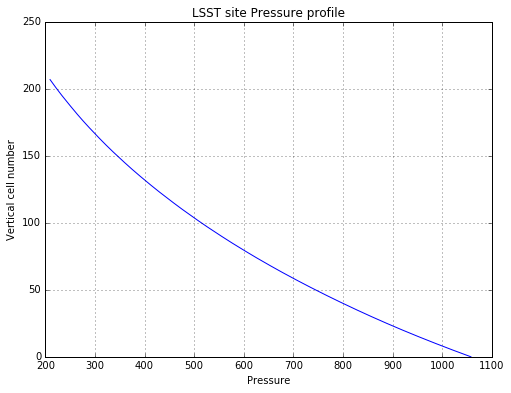

In [114]:
fig=plt.figure(figsize=(8,6))
ax=fig.add_subplot(1,1,1)
ax.plot(pressures,np.arange(0,pressures.size))
title= "LSST site Pressure profile"
ax.set_ylabel('Vertical cell number')
ax.set_xlabel('Pressure')
ax.grid(True)
plt.title(title)

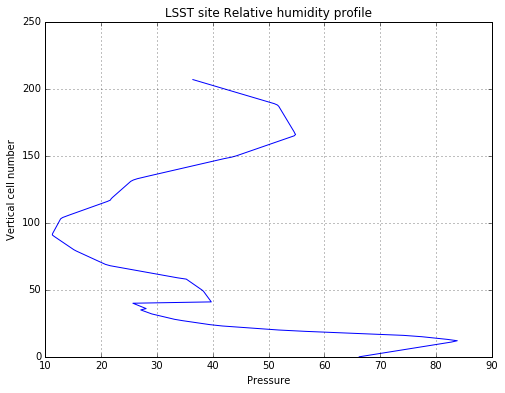

In [116]:
fig=plt.figure(figsize=(8,6))
ax=fig.add_subplot(1,1,1)
ax.plot(humidity,np.arange(0,humidity.size))
title= "LSST site Relative humidity profile"
ax.set_ylabel('Vertical cell number')
ax.set_xlabel('Pressure')
ax.grid(True)
plt.title(title)